<a href="https://colab.research.google.com/github/Rohan20202/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

*  Date : year-month-day
*  Rented Bike count - Count of bikes rented at each hour
*  Hour - Hour of he day
*  Temperature-Temperature in Celsius
*  Humidity - %
*  Windspeed - m/s
*  Visibility - 10m
*  Dew point temperature - Celsius
*  Solar radiation - MJ/m2
*  Rainfall - mm
*  Snowfall - cm
*  Seasons - Winter, Spring, Summer, Autumn
*  Holiday - Holiday/No holiday
*  Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

**Importing the required Libraries**

In [1]:
#loading the libraries
import pandas as pd                 #Extensively used to load and wrangle with the dataset.
import numpy as np                  #For some math operations in predictions
import matplotlib.pyplot as plt     #Used for visualization.
import seaborn as sns               #Used for visualization.
import missingno as mno             #install  pip install missingno
import warnings                     #For filtering and ignoring the warnings.
warnings.filterwarnings('ignore')
from datetime import date           #Used for analysing the date variable
from scipy import stats             #used for statistical analysis
from statsmodels.stats.outliers_influence import variance_inflation_factor        #For Multicolinearity

**Connecting to the drive**

In [2]:
#connecting to the google drive
from google.colab import drive 
drive.mount ("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Loading the dataset**

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Bike Rental prediction - Rohan Jagadale/SeoulBikeData.csv", encoding='ISO-8859-1')

In [4]:
#first 5 rows of data
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
#shape and of the dataset
data.shape

(8760, 14)

In [6]:
#all the columns in the dataset
data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [7]:
#the number of unique values that each column contains
data.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [8]:
data.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [9]:
#showing the datatype of all features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

**Data Cleaning**

**Checking for null values**

In [10]:
pd.DataFrame(data.isna().sum(),columns=['records missings']).T

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
records missings,0,0,0,0,0,0,0,0,0,0,0,0,0,0


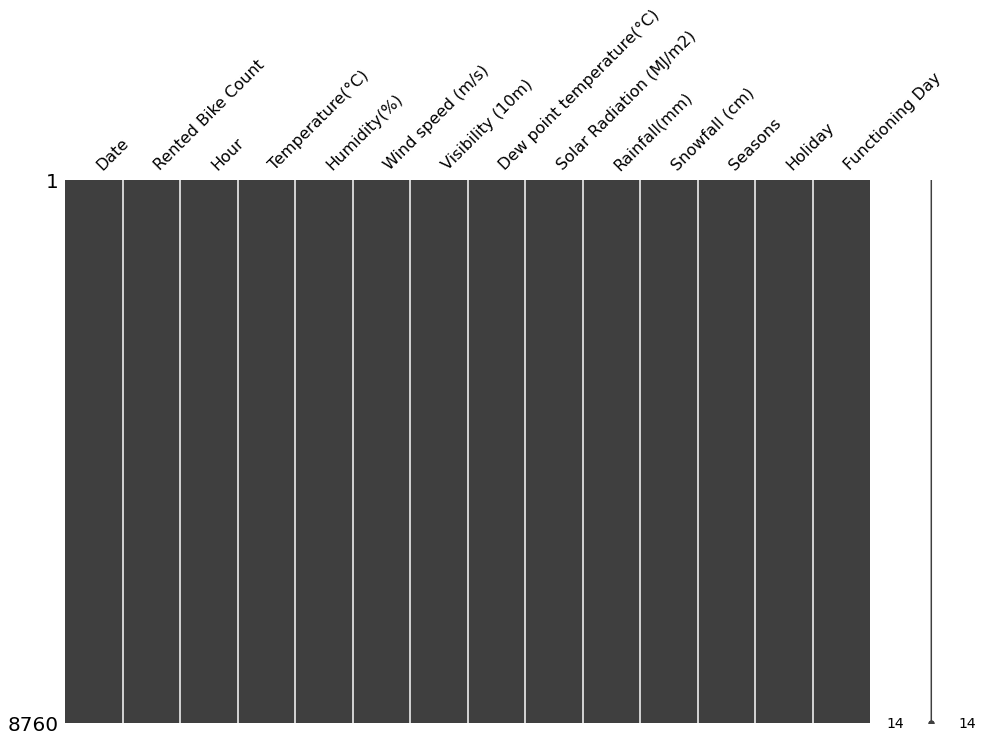

In [11]:
#checking for nan values
mno.matrix(data,figsize=(16,10))

In [12]:
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['Day_name'] = data['Date'].dt.day_name()

In [13]:
#dataframe after adding the columns
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,Day,Day_name
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday


**Data Visualization**

**Seprate dependent and independent variables**

In [14]:
dependent_variable = 'Rented Bike Count'

In [15]:
independent_variables = list(set(data.columns.tolist()) - {dependent_variable})
independent_variables

['Rainfall(mm)',
 'Temperature(°C)',
 'Seasons',
 'Functioning Day',
 'Date',
 'Wind speed (m/s)',
 'Day',
 'Month',
 'Day_name',
 'Year',
 'Snowfall (cm)',
 'Humidity(%)',
 'Dew point temperature(°C)',
 'Visibility (10m)',
 'Holiday',
 'Solar Radiation (MJ/m2)',
 'Hour']

In [16]:
# Divide the columns based on the type for clear management
col_weather = ['Wind speed (m/s)' , 'Dew point temperature(°C)' , 'Visibility (10m)',
              'Solar Radiation (MJ/m2)' , 'Temperature(°C)' , 'Humidity(%)']

col_period = [ 'Day_name' , 'Date' , 'Day' , 'Hour' , 'Month' , 'Year' , 'Functioning Day' , 'Holiday' ]

col_season = ['Rainfall(mm)' , 'Seasons' , 'Snowfall (cm)']

col_target = ["Rented Bike Count"]

In [17]:
independent_vars = data[col_weather +col_period + col_season]
dependent_vars = data[col_target]

In [18]:
independent_vars.describe()

,Wind speed (m/s),Dew point temperature(°C),Visibility (10m),Solar Radiation (MJ/m2),Temperature(°C),Humidity(%),Day,Hour,Month,Year,Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,1.724909,4.073813,1436.825799,0.569111,12.882922,58.226256,15.720548,11.500000,6.526027,2017.915068,0.148687,0.075068
std,1.036300,13.060369,608.298712,0.868746,11.944825,20.362413,8.796749,6.922582,3.448048,0.278796,1.128193,0.436746
min,0.000000,-30.600000,27.000000,0.000000,-17.800000,0.000000,1.000000,0.000000,1.000000,2017.000000,0.000000,0.000000
25%,0.900000,-4.700000,940.000000,0.000000,3.500000,42.000000,8.000000,5.750000,4.000000,2018.000000,0.000000,0.000000
50%,1.500000,5.100000,1698.000000,0.010000,13.700000,57.000000,16.000000,11.500000,7.000000,2018.000000,0.000000,0.000000
75%,2.300000,14.800000,2000.000000,0.930000,22.500000,74.000000,23.000000,17.250000,10.000000,2018.000000,0.000000,0.000000
max,7.400000,27.200000,2000.000000,3.520000,39.400000,98.000000,31.000000,23.000000,12.000000,2018.000000,35.000000,8.800000


In [19]:
dependent_vars.describe()

,Rented Bike Count
count,8760.000000
mean,704.602055
std,644.997468
min,0.000000
25%,191.000000
50%,504.500000
75%,1065.250000
max,3556.000000


**Hitogram for all the features to understand the distribution**

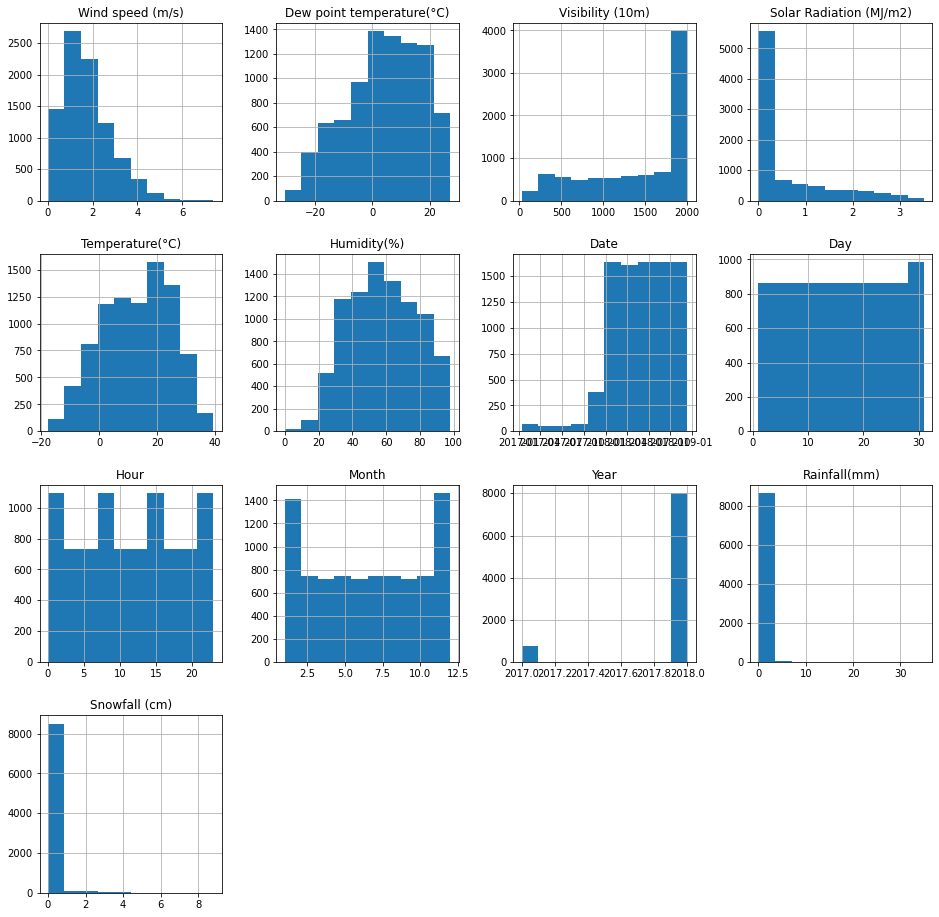

In [20]:
independent_vars.hist(figsize= (16,16))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3b5d4d4a10>]],
      dtype=object)

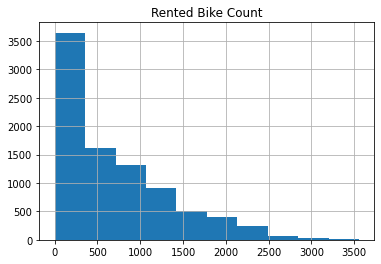

In [21]:
dependent_vars.hist()

**Checking for Outliers**

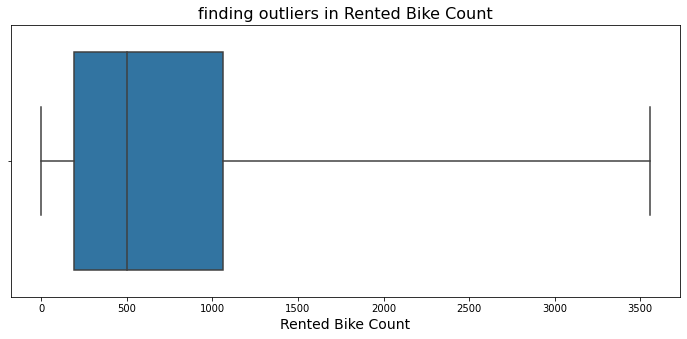

In [22]:
#checking for outliers
plt.figure(figsize=(12,5))
sns.boxplot(data=data, x='Rented Bike Count', whis=3)
plt.title('finding outliers in Rented Bike Count', size=16)
plt.xlabel('Rented Bike Count', size=14)
plt.show()

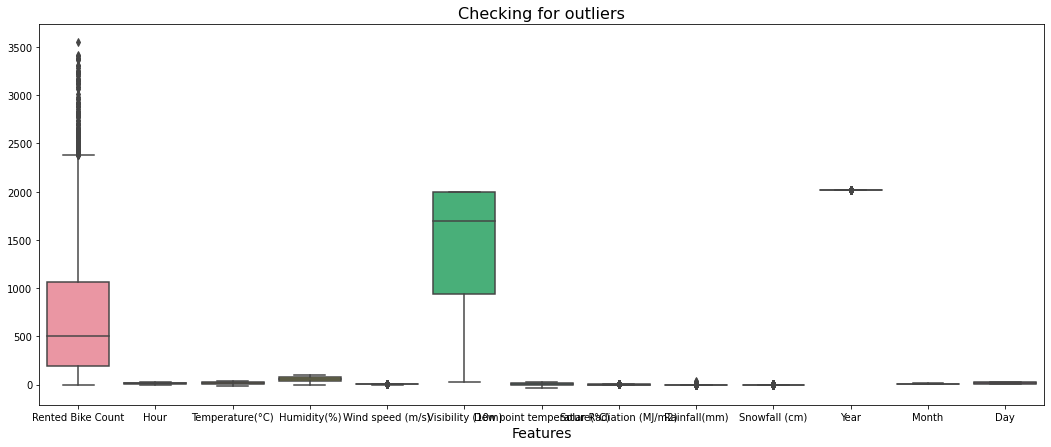

In [23]:
plt.figure(figsize=(18,7))
sns.boxplot(data=data)
plt.title('Checking for outliers', size=16)
plt.xlabel('Features', size=14)
plt.show()

In [24]:
numerical_features = ['Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)']

# List of colors in the color palettes
rgb_values = sns.color_palette("Set1", 9)
# Map continents to the colors
color_map = dict(zip(numerical_features, rgb_values))

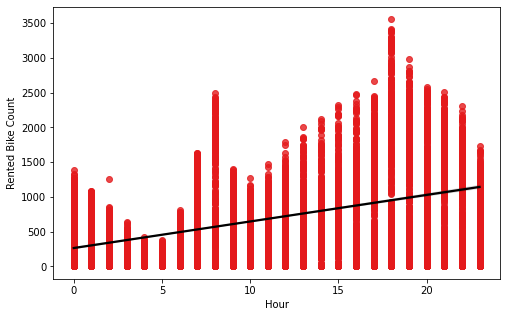

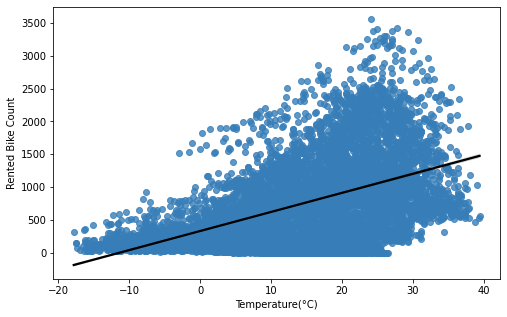

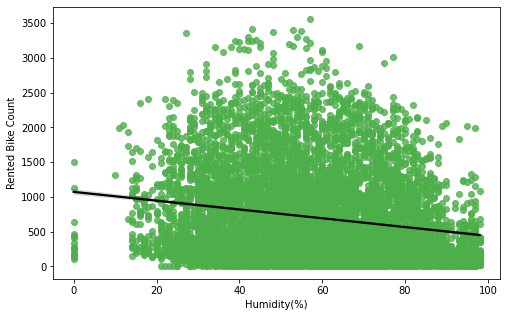

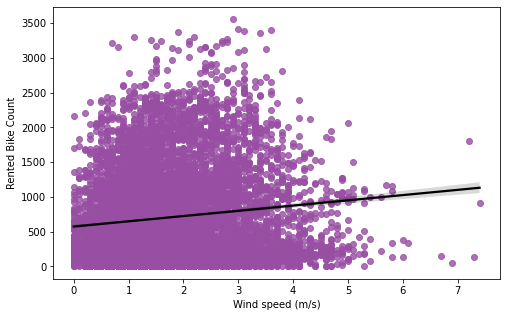

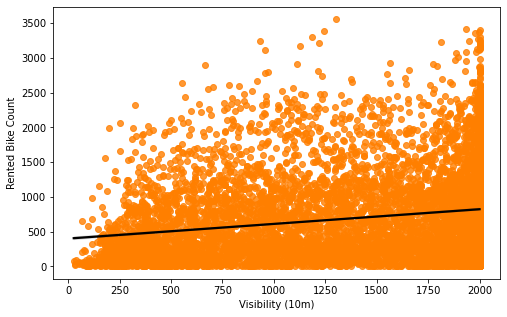

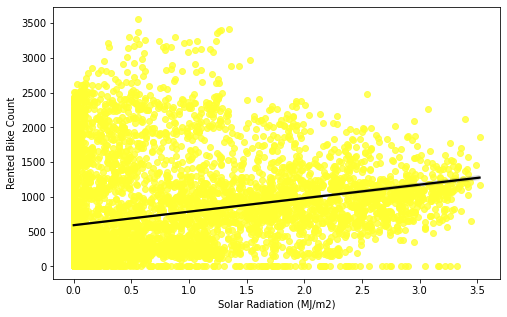

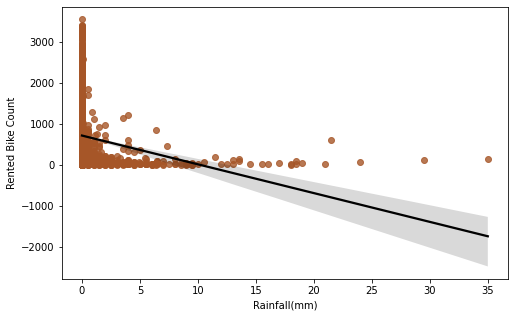

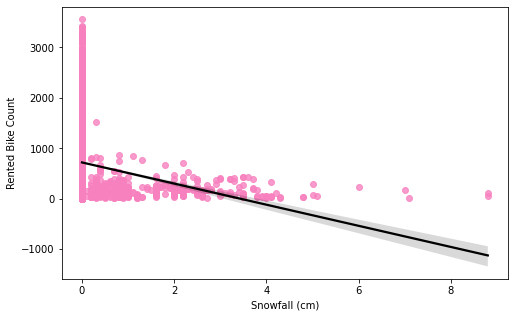

In [25]:
plt.rcParams['figure.figsize'] = (8, 5)
for col, key in zip(numerical_features, color_map):
  plt.figure()
  sns.regplot(x=data[col], y = data['Rented Bike Count'],scatter_kws={"color": color_map[key]}, line_kws={"color": "black"})

**Correlation Heatmap**

In [26]:
data.corr()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Year,Month,Day
Rented Bike Count,1.000000,4.102573e-01,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804,2.151618e-01,7.086107e-02,4.684885e-02
Hour,0.410257,1.000000e+00,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516,2.336763e-14,1.036729e-15,4.206322e-16
Temperature(°C),0.538558,1.241145e-01,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405,3.777958e-01,4.968327e-02,8.090791e-02
Humidity(%),-0.199780,-2.416438e-01,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183,3.592468e-02,4.779778e-02,7.047359e-03
Wind speed (m/s),0.121108,2.851967e-01,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554,-3.780878e-03,-8.206909e-02,-6.123440e-02
Visibility (10m),0.199280,9.875348e-02,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695,5.238110e-02,7.788783e-02,-1.068595e-01
Dew point temperature(°C),0.379788,3.054372e-03,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887,3.363497e-01,6.510073e-02,6.970777e-02
Solar Radiation (MJ/m2),0.261837,1.451309e-01,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301,1.280860e-01,-3.041240e-02,-3.445555e-03
Rainfall(mm),-0.123074,8.714642e-03,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500,2.752192e-02,-2.279368e-02,1.199827e-02
Snowfall (cm),-0.141804,-2.151645e-02,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000,-2.064178e-01,5.475846e-02,1.014355e-01


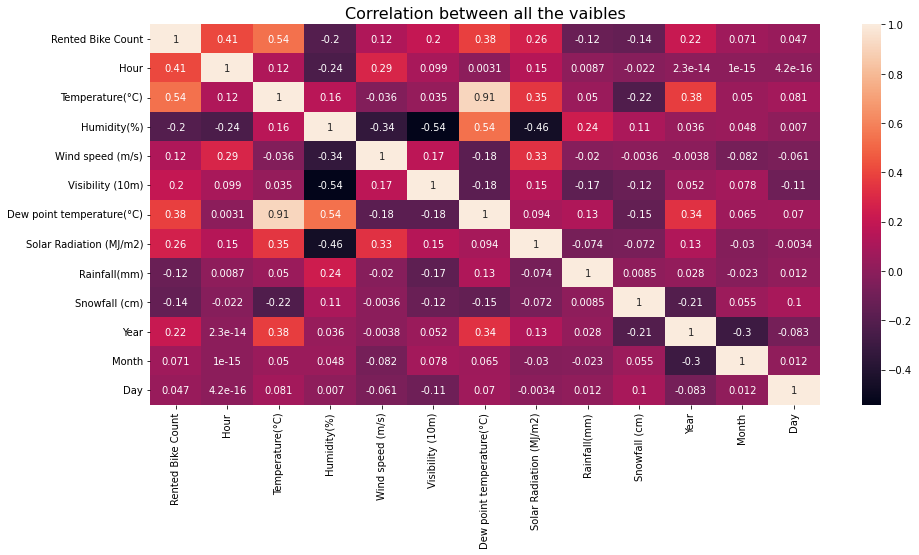

In [27]:
#visualization of the correlation in the heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True)
plt.title('Correlation between all the vaibles', size=16)
plt.show()

In [28]:
#renaming columns
data['Visibility'] = data['Visibility (10m)'].apply(lambda x: 1 if x >= 1500 else 0)
data['Solar Radiation'] = data['Solar Radiation (MJ/m2)'].apply(lambda x: 1 if x >= 0.47 else 0)
data['Rainfall'] = data['Rainfall(mm)'].apply(lambda x: 1 if x > 0.23 else 0)
data['Snowfall'] = data['Snowfall (cm)'].apply(lambda x: 1 if x > 0.81 else 0)

In [29]:
data.rename(columns={'Dew point temperature(°C)':'Dew point temperature', 'Wind speed (m/s)':'Wind speed', 
                     'Humidity(%)':'Humidity', 'Temperature(°C)':'Temperature'}, inplace = True)

In [30]:
#changing the chategorical features into the numerical features
data['Functioning_day'] = data['Functioning Day'].apply(lambda x: 1 if x == 'Yes' else 0)
data['HoliDay'] = data['Holiday'].apply(lambda x: 1 if x == 'Holiday' else 0)

**Functioning day Vs Rented Bike count Vs Hours**

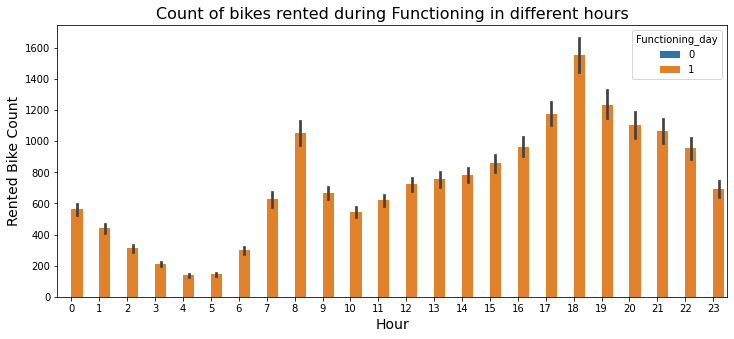

In [31]:
#Functioning day value counts
plt.figure(figsize=(12,5))
sns.barplot(x='Hour', hue='Functioning_day', y='Rented Bike Count', data=data)
plt.title("Count of bikes rented during Functioning in different hours", size=16)
plt.xlabel("Hour", size=14)
plt.ylabel("Rented Bike Count", size=14)
plt.show()

**Seasons vs Rented Bike Count vs Hour**

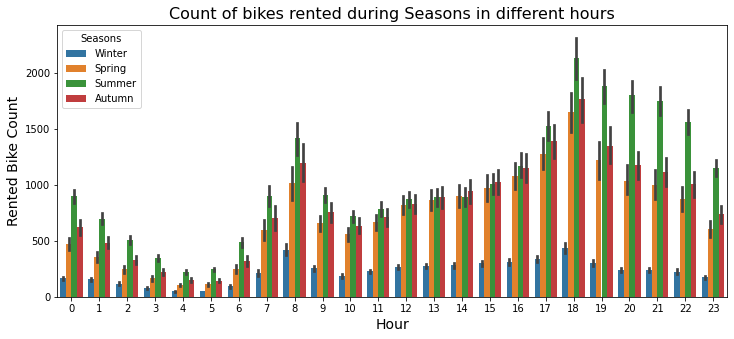

In [32]:
#Seasons vs Rented Bike Count vs Hour
plt.figure(figsize=(12,5))
sns.barplot(x='Hour', y='Rented Bike Count', hue='Seasons', data=data)
plt.title("Count of bikes rented during Seasons in different hours", size=16)
plt.xlabel("Hour", size=14)
plt.ylabel("Rented Bike Count", size=14)
plt.show()

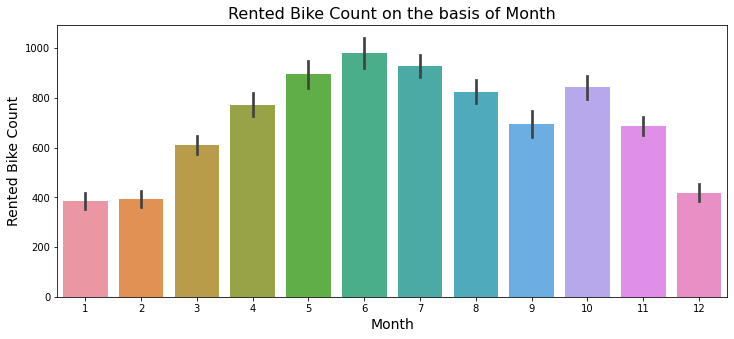

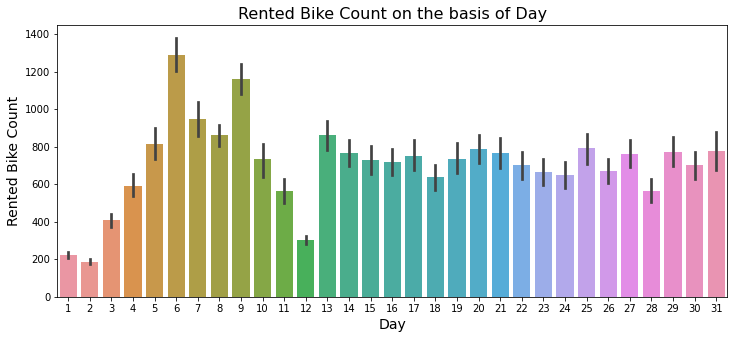

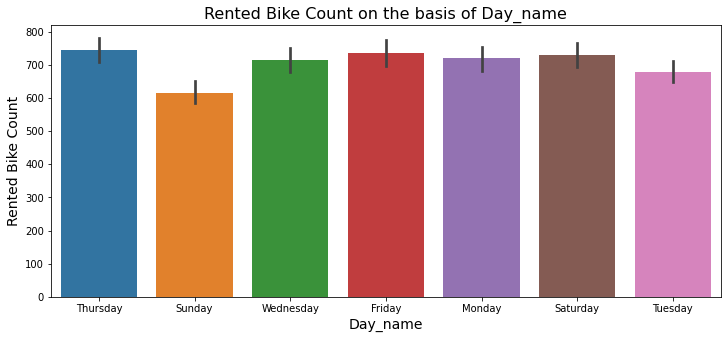

In [33]:
#selecting some features for analysis
parameters = ['Month', 'Day', 'Day_name']

#visualization of the value counts
for col in parameters:
    fig = plt.figure(figsize=(12, 5))
    ax = fig.gca()
    feature = 'Rented Bike Count'
    ch = sns.barplot(x=col, y=feature, data=data, ax=ax)
    plt.xlabel(col, size=14)
    plt.ylabel(feature, size=14)
    plt.title(f"Rented Bike Count on the basis of {col}", size=16)
    plt.show()

**Value counts of Holiday**

In [34]:
# Value counts of Rendted bikes on holidays
holiday = data['Holiday'].value_counts()
holiday

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

([<matplotlib.patches.Wedge at 0x7f3b5ac85bd0>,
 [Text(-0.6904114318815496, -0.8563480920322464, 'No Holiday'),
  Text(0.7531761840398236, 0.9341978568778726, 'Holiday')],
 [Text(-0.37658805375357246, -0.46709895929031614, '95.1%'),
  Text(0.4393527740232304, 0.5449487498454255, '4.9%')])

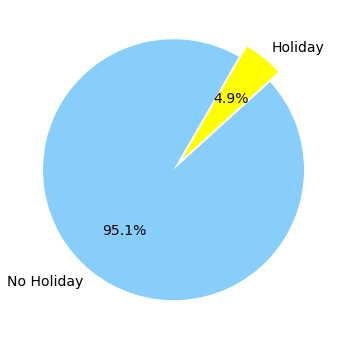

In [35]:
plt.rcParams['figure.figsize'] = 6,6
labels = data['Holiday'].value_counts().index.tolist()
sizes = data['Holiday'].value_counts().tolist()
colors = ['lightskyblue','yellow']
explode = (0, 0.1)
plt.pie(sizes, labels=labels,explode = (0, 0.1), colors=colors,autopct='%1.1f%%' ,startangle=60,textprops={'fontsize': 14})

**Value counts of Rainfall**

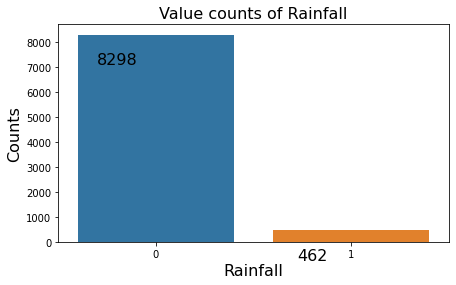

In [36]:
# Value counts of Rendted bikes while rainfall
plt.figure(figsize=(7,4))
ch = sns.countplot(data['Rainfall'])
plt.xlabel('Rainfall', size=16)
plt.ylabel('Counts', size=16)
plt.title('Value counts of Rainfall', size=16)
for p in ch.patches:
    ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=16)
plt.show()

**Value counts of Solar Radiation**

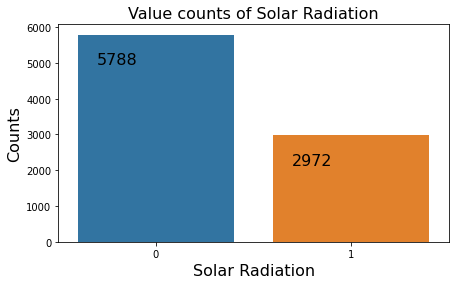

In [37]:
plt.figure(figsize=(7,4))
ch = sns.countplot(data['Solar Radiation'])
plt.xlabel('Solar Radiation', size=16)
plt.ylabel('Counts', size=16)
plt.title('Value counts of Solar Radiation', size=16)
for p in ch.patches:
    ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=16)
plt.show()

**Value counts of Snowfall**

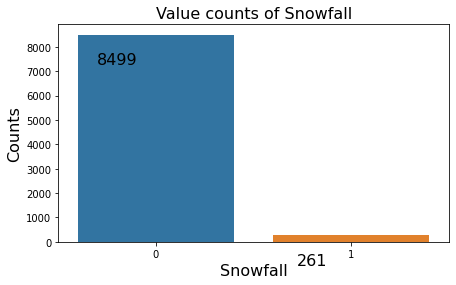

In [38]:
# Value counts of Rendted bikes while snowfall
plt.figure(figsize=(7,4))
ch = sns.countplot(data['Snowfall'])
plt.xlabel('Snowfall', size=16)
plt.ylabel('Counts', size=16)
plt.title('Value counts of Snowfall', size=16)
for p in ch.patches:
    ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', size=16)
plt.show()

**Value counts of Seasons**

In [39]:
# Value counts of Rendted bikes in all seasons
Seasons = data['Seasons'].value_counts()
Seasons

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

([<matplotlib.patches.Wedge at 0x7f3b5c88ad50>,
 [Text(-0.29950529630459266, 1.0895855071932161, 'Spring'),
  Text(-1.0856280248047774, -0.3135471125022172, 'Summer'),
  Text(0.3182162024983327, -1.0842686237586794, 'Autumn'),
  Text(1.0882865268498423, 0.30419144543709287, 'Winter')],
 [Text(-0.16698082891317997, 0.6074680261342709, '25.2%'),
  Text(-0.6052616421477961, -0.174809452103006, '25.2%'),
  Text(0.17741257307429167, -0.6045037459893521, '24.9%'),
  Text(0.6067438158543367, 0.1695934607304146, '24.7%')])

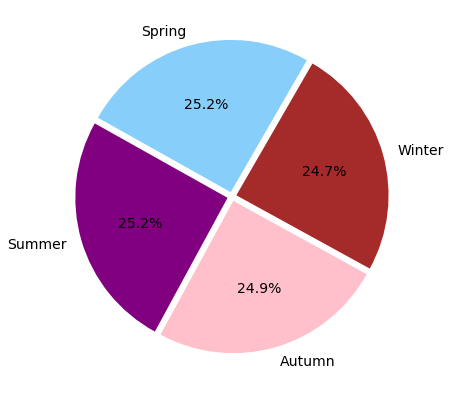

In [40]:
plt.rcParams['figure.figsize'] = 7,7
labels = data['Seasons'].value_counts().index.tolist()
sizes = data['Seasons'].value_counts().tolist()
colors = ['lightskyblue', 'purple','pink','brown']
plt.pie(sizes, labels=labels, explode = (0.03,0.03,0.03,0.03), colors=colors,autopct='%1.1f%%' ,startangle=60,textprops={'fontsize': 14})


**Bike rental market (2017-2018)**

In [41]:
Year = data['Year'].value_counts()
Year

2018    8016
2017     744
Name: Year, dtype: int64

([<matplotlib.patches.Wedge at 0x7f3b5cbb68d0>,
 [Text(-0.7817128787697797, -0.7739024325878967, '2018'),
  Text(0.8527776464081356, 0.8442572391082004, '2017')],
 [Text(-0.4263888429653343, -0.42212859959339816, '91.5%'),
  Text(0.4974536270714124, 0.4924833894797835, '8.5%')])

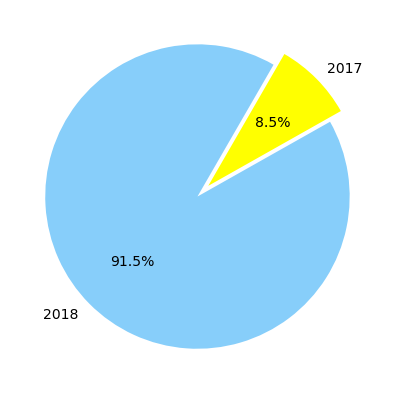

In [42]:
plt.rcParams['figure.figsize'] = 7,7
labels = data['Year'].value_counts().index.tolist()
sizes = data['Year'].value_counts().tolist()
explode = (0,0.1)
colors = ['lightskyblue','yellow']
plt.pie(sizes, labels=labels, explode = (0,0.1) ,colors=colors,autopct='%1.1f%%' ,startangle=60,textprops={'fontsize': 14})


**Preparing the new data frame with selected columns**

In [43]:
bike_df = data[['Year', 'Month', 'Day', 'Day_name', 'Rented Bike Count', 'Hour',  'HoliDay',  'Visibility','Temperature', 
                'Humidity', 'Dew point temperature', 'Solar Radiation', 'Rainfall', 'Snowfall', 'Seasons', 'Wind speed']]

In [44]:
bike_df.head()

,Year,Month,Day,Day_name,Rented Bike Count,Hour,HoliDay,Visibility,Temperature,Humidity,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Wind speed
0,2017,1,12,Thursday,254,0,0,1,-5.2,37,-17.6,0,0,0,Winter,2.2
1,2017,1,12,Thursday,204,1,0,1,-5.5,38,-17.6,0,0,0,Winter,0.8
2,2017,1,12,Thursday,173,2,0,1,-6.0,39,-17.7,0,0,0,Winter,1.0
3,2017,1,12,Thursday,107,3,0,1,-6.2,40,-17.6,0,0,0,Winter,0.9
4,2017,1,12,Thursday,78,4,0,1,-6.0,36,-18.6,0,0,0,Winter,2.3


In [45]:
bike_df.columns

Index(['Year', 'Month', 'Day', 'Day_name', 'Rented Bike Count', 'Hour',
       'HoliDay', 'Visibility', 'Temperature', 'Humidity',
       'Dew point temperature', 'Solar Radiation', 'Rainfall', 'Snowfall',
       'Seasons', 'Wind speed'],
      dtype='object')

In [46]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   8760 non-null   int64  
 1   Month                  8760 non-null   int64  
 2   Day                    8760 non-null   int64  
 3   Day_name               8760 non-null   object 
 4   Rented Bike Count      8760 non-null   int64  
 5   Hour                   8760 non-null   int64  
 6   HoliDay                8760 non-null   int64  
 7   Visibility             8760 non-null   int64  
 8   Temperature            8760 non-null   float64
 9   Humidity               8760 non-null   int64  
 10  Dew point temperature  8760 non-null   float64
 11  Solar Radiation        8760 non-null   int64  
 12  Rainfall               8760 non-null   int64  
 13  Snowfall               8760 non-null   int64  
 14  Seasons                8760 non-null   object 
 15  Wind

In [47]:
#value counts for seasons
bike_df.Seasons.value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

**Dummy Variables**

In [48]:
#onehot encoding of seasons 
bike_df['Seasons'] =np.where(bike_df['Seasons']=='Spring',1,0)
bike_df['Seasons'] =np.where(bike_df['Seasons']=='Summer',1,0)
bike_df['Seasons'] =np.where(bike_df['Seasons']=='Autumn',1,0)
bike_df['Seasons'] =np.where(bike_df['Seasons']=='Winter',1,0)

In [49]:
#value counts after convering the seasons column into a numerical feature
bike_df['Seasons'].value_counts()

0    8760
Name: Seasons, dtype: int64

**Variance Inflation Factor**

In [50]:
#Multicollinearity
def cal_vif(X):
  vif = pd.DataFrame()
  vif['Variables'] = X.columns
  vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  return vif

In [51]:
cal_vif(bike_df[[i for i in bike_df.describe().columns if i not in['Year','Temperature','Seasons','Humidity']]])

,Variables,VIF
0,Month,3.507648
1,Day,3.201773
2,Rented Bike Count,3.887731
3,Hour,4.690287
4,HoliDay,1.061088
5,Visibility,2.473721
6,Dew point temperature,1.623920
7,Solar Radiation,1.833599
8,Rainfall,1.248434
9,Snowfall,1.093153


**Data Preprocessing**

In [52]:
#defining dependent and independent variables 
dependent_variable = 'Rented Bike Count'
independent_variable = ['Hour', 'Wind speed', 'Dew point temperature', 'Month', 'HoliDay',  
                        'Visibility', 'Solar Radiation', 'Rainfall', 'Snowfall', 'Day']

In [53]:
#defining X and y varaibles 
y = bike_df[dependent_variable]
X = bike_df[independent_variable]

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 

**Splitting train and test data sets**

In [55]:
#splitting train and test data sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
#size of train and test datasets
print(f'Size of X_train is: {X_train.shape}')
print(f'Size of X_test is: {X_test.shape}')
print(f'Size of y_train is: {y_train.shape}')
print(f'Size of y_test is: {y_test.shape}')

Size of X_train is: (7008, 10)
Size of X_test is: (1752, 10)
Size of y_train is: (7008,)
Size of y_test is: (1752,)


In [57]:
#scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Model Implemented**

**1. Linear Regression**

**2. Lasso Regression**

**3. Random Forest Regressor**

**1. Linear Regression**

In [58]:
from sklearn.linear_model import LinearRegression 

In [59]:
#Creating the Linear regression object
regressor = LinearRegression()
#Train the model using the training set
regressor.fit(X_train, y_train)

LinearRegression()

In [60]:
#linear regression scoe
regressor.score(X_train, y_train)

0.43941668694159053

In [61]:
#defining the predicted values 
pred_train = regressor.predict(X_train)
pred_test = regressor.predict(X_test)

**Model Evaluation**

In [62]:
MSE_train = mean_squared_error(y_train, pred_train)
print(f'MSE= {MSE_train}')

RMSE_train = np.sqrt(MSE_train)
print(f'RMSE= {RMSE_train}')

R2_Score_train = r2_score(y_train, pred_train)
print(f'R2_Score= {R2_Score_train}')

MSE= 233093.9645251852
RMSE= 482.7980577065169
R2_Score= 0.43941668694159053


In [63]:
MSE_test = mean_squared_error(y_test, pred_test)
print(f'MSE= {MSE_test}')

RMSE_test = np.sqrt(MSE_test)
print(f'RMSE= {RMSE_test}')

R2_Score_test = r2_score(y_test, pred_test)
print(f'R2_Score= {R2_Score_test}')

MSE= 241351.7046418738
RMSE= 491.2755892998082
R2_Score= 0.4207275074189729


**Visualization of Trainset output**

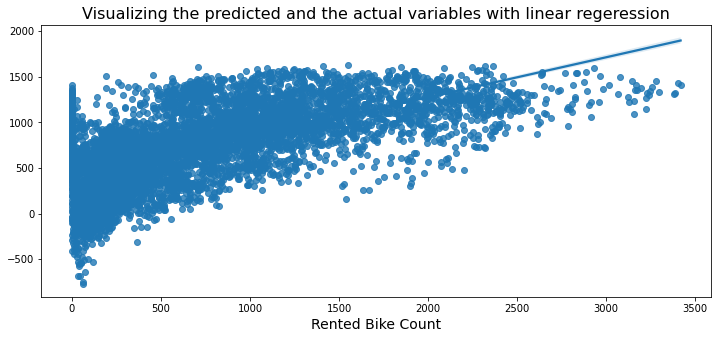

In [64]:
plt.figure(figsize=(12, 5))
sns.regplot(y_train, pred_train)
plt.title('Visualizing the predicted and the actual variables with linear regeression', size=16)
plt.xlabel('Rented Bike Count', size=14)
plt.show()

**Visualization of Testset Output**

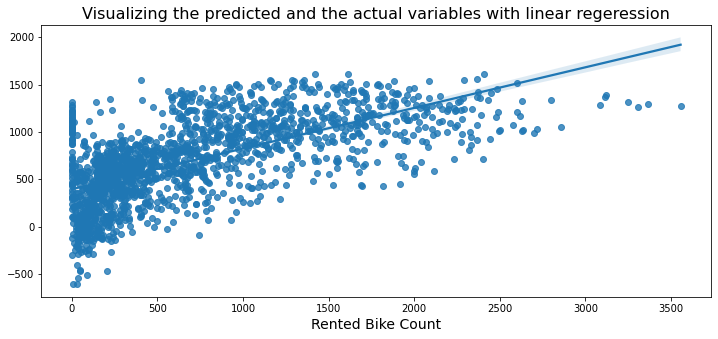

In [65]:
plt.figure(figsize=(12, 5))
sns.regplot(y_test, pred_test)
plt.title('Visualizing the predicted and the actual variables with linear regeression', size=16)
plt.xlabel('Rented Bike Count', size=14)
plt.show()

**Observation on Linear regression model :**

1. The Score for linear regression is around  0.4879. 

2. Accuracy on **Traing dataset** is  48.79%

3. Accuracy on **Testing dataset** is also  47.90%. 

Linear regression model is not performing well phreps we should try diffrent model.


**2. Lasso Regression**

In [66]:
from sklearn.linear_model import Lasso

In [67]:
#implementing the model
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [68]:
lasso.score(X_train, y_train)

0.43941668694138214

In [69]:
#defining the predicted values 
pred_train =regressor.predict(X_train)
pred_test = regressor.predict(X_test)

**Model Evaluation**

In [70]:
MSE_train = mean_squared_error(y_train, pred_train)
print(f'MSE= {MSE_train}')

RMSE_train = np.sqrt(MSE_train)
print(f'RMSE= {RMSE_train}')

R2_Score_train = r2_score(y_train, pred_train)
print(f'R2_Score= {R2_Score_train}')

MSE= 233093.9645251852
RMSE= 482.7980577065169
R2_Score= 0.43941668694159053


In [71]:
MSE_test = mean_squared_error(y_test, pred_test)
print(f'MSE= {MSE_test}')

RMSE_test = np.sqrt(MSE_test)
print(f'RMSE= {RMSE_test}')

R2_Score_test = r2_score(y_test, pred_test)
print(f'R2_Score= {R2_Score_test}')

MSE= 241351.7046418738
RMSE= 491.2755892998082
R2_Score= 0.4207275074189729


**Visualization of Trainset output**

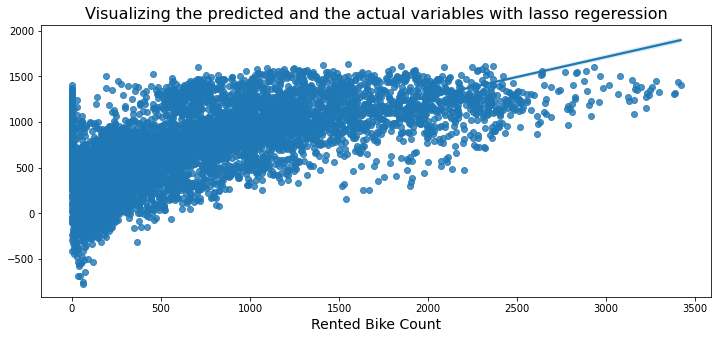

In [72]:
plt.figure(figsize=(12, 5))
sns.regplot(y_train, pred_train)
plt.title('Visualizing the predicted and the actual variables with lasso regeression', size=16)
plt.xlabel('Rented Bike Count', size=14)
plt.show()

**Visualization of Testset Output**

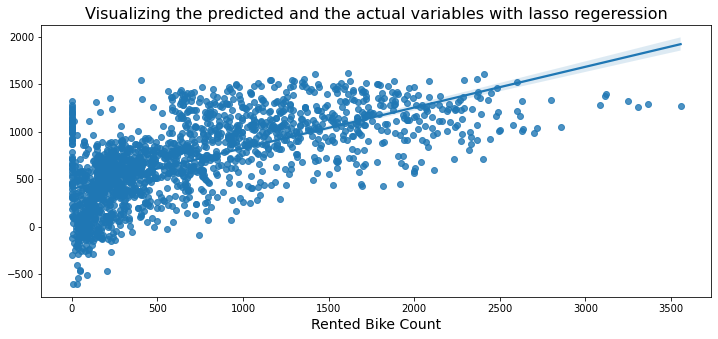

In [73]:
plt.figure(figsize=(12, 5))
sns.regplot(y_test, pred_test)
plt.title('Visualizing the predicted and the actual variables with lasso regeression', size=16)
plt.xlabel('Rented Bike Count', size=14)
plt.show()

**Observation on Lasso regression model :**

1. The Score for linear regression is around  0.4879. 

2. Accuracy on **Traing** **dataset** is  48.79%

3. Accuracy on **Testing dataset** is also  48.90%. 

Lasso regression model is also gives the same result as Linear regression Which means the model needs to be trained with more data.


**Let's try Random Forest Regressor**

**3. Random Forest Regressor**

In [74]:
from sklearn.ensemble import RandomForestRegressor

In [75]:
#implementing the model
rf_reg = RandomForestRegressor(n_estimators = 1000, random_state=42)
#training the model
rf_reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [76]:
#defining the predicted variables
pred_train = rf_reg.predict(X_train)
pred_test = rf_reg.predict(X_test)

****Model Evaluation****

In [77]:
MSE_train = mean_squared_error(y_train, pred_train)
print(f'MSE= {MSE_train}')

RMSE_train = np.sqrt(MSE_train)
print(f'RMSE= {RMSE_train}')

R2_Score_train = r2_score(y_train, pred_train)
print(f'R2_Score= {R2_Score_train}')

MSE= 11497.651699418093
RMSE= 107.2271033807129
R2_Score= 0.9723485260753929


In [78]:
MSE_test = mean_squared_error(y_test, pred_test)
print(f'MSE= {MSE_test}')

RMSE_test = np.sqrt(MSE_test)
print(f'RMSE= {RMSE_test}')

R2_Score_test = r2_score(y_test, pred_test)
print(f'R2_Score= {R2_Score_test}')

MSE= 84033.24421539098
RMSE= 289.8848809706898
R2_Score= 0.7983103251391985


**Visualization of Trainset output**

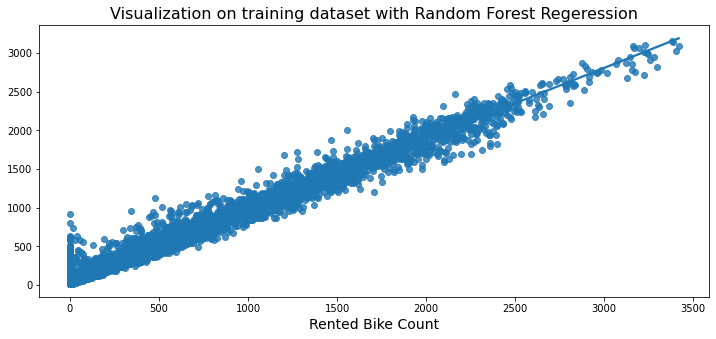

In [79]:
plt.figure(figsize=(12, 5))
sns.regplot(y_train, pred_train)
plt.title('Visualization on training dataset with Random Forest Regeression', size=16)
plt.xlabel('Rented Bike Count', size=14)
plt.show()

**Visualization of Testset Output**

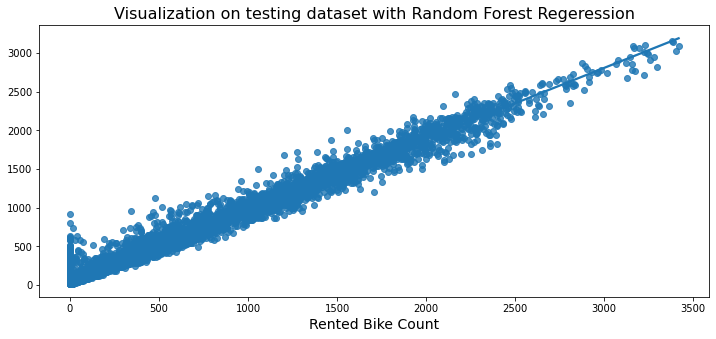

In [80]:
plt.figure(figsize=(12, 5))
sns.regplot(y_train, pred_train)
plt.title('Visualization on testing dataset with Random Forest Regeression', size=16)
plt.xlabel('Rented Bike Count', size=14)
plt.show()

**Observation on Random Forest Regressor model :**

1. Random Forest Regressor model wroks well than linear and lasso.

2. Accuracy on **Traing dataset** is  97.49%

3. Accuracy on **Testing dataset** is  80.02%

***Let's try some Hyperparameter Tunning***

In [81]:
n_estimators= [160,210,10]
max_depth = [25,35,1]
min_samples_split = [2,5,1]
min_samples_leaf = [1,5,1]
max_features= [4,10,1]

In [82]:
random_grid = {'n_estimators' : n_estimators,
               'max_depth' : max_depth,
               'min_samples_split' : min_samples_split,
               'min_samples_leaf' : min_samples_leaf,
               'max_features' : max_features}

print(random_grid)              

{'n_estimators': [160, 210, 10], 'max_depth': [25, 35, 1], 'min_samples_split': [2, 5, 1], 'min_samples_leaf': [1, 5, 1], 'max_features': [4, 10, 1]}


In [83]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [84]:
#defining the predicted variables
pred_train = rf_model.predict(X_train)
pred_test = rf_model.predict(X_test)

In [85]:
from sklearn.model_selection import RandomizedSearchCV

In [86]:
rf_grid = RandomizedSearchCV(estimator= rf_model , param_distributions= random_grid , cv = 5, n_iter= 50 , verbose = 1)

In [87]:
rf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50,
                   param_distributions={'max_depth': [25, 35, 1],
                                        'max_features': [4, 10, 1],
                                        'min_samples_leaf': [1, 5, 1],
                                        'min_samples_split': [2, 5, 1],
                                        'n_estimators': [160, 210, 10]},
                   verbose=1)

In [88]:
rf_grid.best_params_

{'max_depth': 25,
 'max_features': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 160}

In [89]:
MSE_train = mean_squared_error(y_train, pred_train)
print(f'MSE= {MSE_train}')

R2_Score_train = r2_score(y_train, pred_train)
print(f'R2_Score= {R2_Score_train}')

MSE= 12086.607193921234
R2_Score= 0.9709321074949073


In [90]:
MSE_test = mean_squared_error(y_test, pred_test)
print(f'MSE= {MSE_test}')

R2_Score_test = r2_score(y_test, pred_test)
print(f'R2_Score= {R2_Score_test}')

MSE= 85189.25756512556
R2_Score= 0.7955357570641508


In [91]:
print(f' Train Accuracy : {rf_grid.score(X_train,y_train):.3f}')
print(f' Test Accuracy : {rf_grid.score(X_test,y_test):.3f}')

 Train Accuracy : 0.973
 Test Accuracy : 0.806


**Observation on Random Forest Regressor model (using Hyperparameters) :**

1. Above model shows more accuracy than Random Forest Regression( without hyperparameter.)

2. Accuracy on **Traing dataset** is  97.60%

3. Accuracy on **Testing dataset** is  82.70%

1. Linear Regression,Lasso Regression and Random Forest Regression are used to train the model.

2. Linear Regression and Lasso Regression model is not performing well. both gives **49%** accuracy.

3. As per the evaluation its better to implement the Random Forest Regression rather than going for Linear or Lasso Regression.

4. When it comes to the accuracy of the Random Forest Regression is performing well on the test dataset with the accuracy of **82%**

5. Accuracy of Random Forest Regression (using hyperparameters) is **83**%